In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:
import os
os.chdir('gdrive/MyDrive/ml_project')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Malicious-Insider-Attack-Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0.1                      int64  
 1   Unnamed: 0                        int64  
 2   pkSeqID                           int64  
 3   stime                             float64
 4   flgs                              object 
 5   flgs_number                       int64  
 6   proto                             object 
 7   proto_number                      int64  
 8   saddr                             object 
 9   sport                             object 
 10  daddr                             object 
 11  dport                             object 
 12  pkts                              int64  
 13  bytes                             int64  
 14  state                             object 
 15  state_number                      int64  
 16  ltime                             fl

In [ ]:
#unwanted columns removing

unwanted_columns = ['Unnamed: 0.1','Unnamed: 0','pkSeqID','flgs_number',
                   'sport','pkts','bytes','state_number','seq','mean',
                   'stddev','sum','min','max','sbytes','dbytes','srate',
                   'TnBPSrcIP','TnBPDstIP','TnP_PSrcIP','TnP_PDstIP',
                   'AR_P_Proto_P_Sport','AR_P_Proto_P_Dport','stime']
df = df.drop(unwanted_columns,axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              object 
 1   proto                             object 
 2   proto_number                      int64  
 3   saddr                             object 
 4   daddr                             object 
 5   dport                             object 
 6   state                             object 
 7   ltime                             float64
 8   dur                               float64
 9   spkts                             int64  
 10  dpkts                             int64  
 11  rate                              float64
 12  drate                             float64
 13  TnP_PerProto                      int64  
 14  TnP_Per_Dport                     int64  
 15  AR_P_Proto_P_SrcIP                float64
 16  AR_P_Proto_P_DstIP                fl

In [ ]:
df.isnull().sum()

flgs                                0
proto                               0
proto_number                        0
saddr                               0
daddr                               0
dport                               0
state                               0
ltime                               0
dur                                 0
spkts                               0
dpkts                               0
rate                                0
drate                               0
TnP_PerProto                        0
TnP_Per_Dport                       0
AR_P_Proto_P_SrcIP                  0
AR_P_Proto_P_DstIP                  0
N_IN_Conn_P_DstIP                   0
N_IN_Conn_P_SrcIP                   0
Pkts_P_State_P_Protocol_P_DestIP    0
Pkts_P_State_P_Protocol_P_SrcIP     0
attack                              0
dtype: int64

In [ ]:
df['attack'].unique()

array([1, 0])

In [ ]:
df['attack'].value_counts()

1    1926624
0        477
Name: attack, dtype: int64

In [ ]:
df['proto'].unique()

array(['tcp', 'arp', 'udp', 'icmp', 'ipv6-icmp'], dtype=object)

In [ ]:
df['proto'].value_counts()

tcp          978397
udp          948598
arp              82
icmp             16
ipv6-icmp         8
Name: proto, dtype: int64

In [ ]:
indices = df[df['attack'] == 0].index.tolist()

In [ ]:
indices

[1926624,
 1926625,
 1926626,
 1926627,
 1926628,
 1926629,
 1926630,
 1926631,
 1926632,
 1926633,
 1926634,
 1926635,
 1926636,
 1926637,
 1926638,
 1926639,
 1926640,
 1926641,
 1926642,
 1926643,
 1926644,
 1926645,
 1926646,
 1926647,
 1926648,
 1926649,
 1926650,
 1926651,
 1926652,
 1926653,
 1926654,
 1926655,
 1926656,
 1926657,
 1926658,
 1926659,
 1926660,
 1926661,
 1926662,
 1926663,
 1926664,
 1926665,
 1926666,
 1926667,
 1926668,
 1926669,
 1926670,
 1926671,
 1926672,
 1926673,
 1926674,
 1926675,
 1926676,
 1926677,
 1926678,
 1926679,
 1926680,
 1926681,
 1926682,
 1926683,
 1926684,
 1926685,
 1926686,
 1926687,
 1926688,
 1926689,
 1926690,
 1926691,
 1926692,
 1926693,
 1926694,
 1926695,
 1926696,
 1926697,
 1926698,
 1926699,
 1926700,
 1926701,
 1926702,
 1926703,
 1926704,
 1926705,
 1926706,
 1926707,
 1926708,
 1926709,
 1926710,
 1926711,
 1926712,
 1926713,
 1926714,
 1926715,
 1926716,
 1926717,
 1926718,
 1926719,
 1926720,
 1926721,
 1926722,
 1926723,


In [ ]:
df = df.drop(indices,axis=0)

In [ ]:
df.shape

(1926624, 22)

In [ ]:
df['proto'].value_counts()

tcp     978350
udp     948223
arp         35
icmp        16
Name: proto, dtype: int64

In [ ]:
indices_proto_arp = df[df['proto'] == 'arp'].index.tolist()
print(indices_proto_arp)
print(len(indices_proto_arp))

[191, 176368, 176490, 177482, 178365, 186197, 186482, 186785, 256457, 471102, 525286, 525287, 592184, 787433, 787434, 820816, 946692, 961129, 974546, 1226159, 1228080, 1231158, 1232748, 1236589, 1236974, 1239532, 1239533, 1502673, 1502674, 1764633, 1764824, 1764825, 1764826, 1764827, 1863705]
35


In [ ]:
df = df.drop(indices_proto_arp,axis=0)

In [ ]:
df['proto'].value_counts()

tcp     978350
udp     948223
icmp        16
Name: proto, dtype: int64

In [ ]:
indices_proto_icmp = df[df['proto'] == 'icmp'].index.tolist()
print(indices_proto_icmp)
print(len(indices_proto_icmp))

[978389, 994630, 1043479, 1044937, 1275820, 1289843, 1342616, 1347138, 1563276, 1573762, 1647848, 1650122, 1812831, 1823392, 1909210, 1913051]
16


In [ ]:
data = df.drop(indices_proto_icmp,axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926573 entries, 0 to 1926623
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              object 
 1   proto                             object 
 2   proto_number                      int64  
 3   saddr                             object 
 4   daddr                             object 
 5   dport                             object 
 6   state                             object 
 7   ltime                             float64
 8   dur                               float64
 9   spkts                             int64  
 10  dpkts                             int64  
 11  rate                              float64
 12  drate                             float64
 13  TnP_PerProto                      int64  
 14  TnP_Per_Dport                     int64  
 15  AR_P_Proto_P_SrcIP                float64
 16  AR_P_Proto_P_DstIP                fl

In [ ]:
data['proto'].value_counts()

tcp    978350
udp    948223
Name: proto, dtype: int64

In [ ]:
data.head()

,flgs,proto,proto_number,saddr,daddr,dport,state,ltime,dur,spkts,...,drate,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,e,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528103e+09,6.406424,6,...,0.468280,328,700,1.26889,1.21662,40,38,328,308,1
1,e,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528103e+09,6.405851,6,...,0.468322,328,700,1.26889,1.21662,40,38,328,308,1
2,e,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528103e+09,6.401038,5,...,0.900214,328,700,1.26889,1.21662,40,38,328,308,1
3,e,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528103e+09,6.400703,5,...,0.898208,328,700,1.26889,1.21662,40,38,328,308,1
4,e,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528103e+09,6.400472,5,...,0.898394,328,700,1.26889,1.21662,40,38,328,308,1


In [ ]:
for i in data.select_dtypes(include='object').columns:
    print(f"length of unique values for {i} : {len(data[i].unique())}")
    print()
    print(f"unique_values for {i} : {data[i].unique()}")
    print()
    print(f"value_counts for unique values of {i} : {data[i].value_counts()}")
    print("--------------------------------------------------------------------")

length of unique values for flgs : 6

unique_values for flgs : ['e' 'e s' 'e *' 'e d' 'e g' 'eU']

value_counts for unique values of flgs : e      1129160
e s     778517
e g      17825
e *        809
eU         247
e d         15
Name: flgs, dtype: int64
--------------------------------------------------------------------
length of unique values for proto : 2

unique_values for proto : ['tcp' 'udp']

value_counts for unique values of proto : tcp    978350
udp    948223
Name: proto, dtype: int64
--------------------------------------------------------------------
length of unique values for saddr : 5

unique_values for saddr : ['192.168.100.150' '192.168.100.149' '192.168.100.147' '192.168.100.148'
 '192.168.100.3']

value_counts for unique values of saddr : 192.168.100.147    519959
192.168.100.148    494633
192.168.100.150    456937
192.168.100.149    451588
192.168.100.3        3456
Name: saddr, dtype: int64
--------------------------------------------------------------------
length 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926573 entries, 0 to 1926623
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              object 
 1   proto                             object 
 2   proto_number                      int64  
 3   saddr                             object 
 4   daddr                             object 
 5   dport                             object 
 6   state                             object 
 7   ltime                             float64
 8   dur                               float64
 9   spkts                             int64  
 10  dpkts                             int64  
 11  rate                              float64
 12  drate                             float64
 13  TnP_PerProto                      int64  
 14  TnP_Per_Dport                     int64  
 15  AR_P_Proto_P_SrcIP                float64
 16  AR_P_Proto_P_DstIP                fl

In [ ]:
data['dport'] = pd.to_numeric(data['dport']).astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926573 entries, 0 to 1926623
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   flgs                              object 
 1   proto                             object 
 2   proto_number                      int64  
 3   saddr                             object 
 4   daddr                             object 
 5   dport                             int64  
 6   state                             object 
 7   ltime                             float64
 8   dur                               float64
 9   spkts                             int64  
 10  dpkts                             int64  
 11  rate                              float64
 12  drate                             float64
 13  TnP_PerProto                      int64  
 14  TnP_Per_Dport                     int64  
 15  AR_P_Proto_P_SrcIP                float64
 16  AR_P_Proto_P_DstIP                fl

In [ ]:
data['dport'].unique()

array([   80,  1160,  1161, ..., 26817, 26820, 26821])

In [ ]:
data['dport'].value_counts()

80       1923117
6402           2
6396           2
6393           2
6392           2
          ...   
13071          1
13072          1
13073          1
13076          1
13051          1
Name: dport, Length: 3408, dtype: int64

In [ ]:
# Separate the DataFrame into 'tcp' and 'udp' categories
tcp_df = data[data['proto'] == 'tcp']
udp_df = data[data['proto'] == 'udp']

# Randomly sample 50,000 rows from each category
tcp_sampled = tcp_df.sample(n=50000, replace=False)
udp_sampled = udp_df.sample(n=50000, replace=False)

# Concatenate the sampled rows
new_data = pd.concat([tcp_sampled, udp_sampled])

# Shuffle the concatenated DataFrame to randomize the order of rows
new_data = new_data.sample(frac=1).reset_index(drop=True)

# Print the first few rows of the sampled DataFrame
new_data.shape

(100000, 22)

In [ ]:
new_data['proto'].value_counts()

udp    50000
tcp    50000
Name: proto, dtype: int64

In [ ]:
new_data.head()

,flgs,proto,proto_number,saddr,daddr,dport,state,ltime,dur,spkts,...,drate,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,e,udp,3,192.168.100.150,192.168.100.3,80,INT,1.528099e+09,12.865453,6,...,0.0,952,952,0.438101,0.660653,100,11,952,62,1
1,e s,tcp,1,192.168.100.148,192.168.100.3,80,REQ,1.528096e+09,12.789845,5,...,0.0,500,500,0.390936,0.390936,100,100,500,500,1
2,e s,tcp,1,192.168.100.150,192.168.100.3,80,RST,1.528096e+09,11.091993,5,...,0.0,595,595,0.541129,0.529305,100,95,570,570,1
3,e s,tcp,1,192.168.100.147,192.168.100.3,80,RST,1.528096e+09,14.792935,7,...,0.0,656,656,0.540800,0.487600,100,64,512,512,1
4,e,udp,3,192.168.100.149,192.168.100.3,80,INT,1.528099e+09,11.427499,6,...,0.0,788,788,0.525049,0.674331,100,36,788,216,1


In [ ]:
x = new_data.drop(['proto'],axis = 1)
x.head()

,flgs,proto_number,saddr,daddr,dport,state,ltime,dur,spkts,dpkts,...,drate,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,e,3,192.168.100.150,192.168.100.3,80,INT,1.528099e+09,12.865453,6,0,...,0.0,952,952,0.438101,0.660653,100,11,952,62,1
1,e s,1,192.168.100.148,192.168.100.3,80,REQ,1.528096e+09,12.789845,5,0,...,0.0,500,500,0.390936,0.390936,100,100,500,500,1
2,e s,1,192.168.100.150,192.168.100.3,80,RST,1.528096e+09,11.091993,5,1,...,0.0,595,595,0.541129,0.529305,100,95,570,570,1
3,e s,1,192.168.100.147,192.168.100.3,80,RST,1.528096e+09,14.792935,7,1,...,0.0,656,656,0.540800,0.487600,100,64,512,512,1
4,e,3,192.168.100.149,192.168.100.3,80,INT,1.528099e+09,11.427499,6,0,...,0.0,788,788,0.525049,0.674331,100,36,788,216,1


In [ ]:
x.shape

(100000, 21)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   flgs                              100000 non-null  object 
 1   proto_number                      100000 non-null  int64  
 2   saddr                             100000 non-null  object 
 3   daddr                             100000 non-null  object 
 4   dport                             100000 non-null  int64  
 5   state                             100000 non-null  object 
 6   ltime                             100000 non-null  float64
 7   dur                               100000 non-null  float64
 8   spkts                             100000 non-null  int64  
 9   dpkts                             100000 non-null  int64  
 10  rate                              100000 non-null  float64
 11  drate                             100000 non-null  fl

In [ ]:
y = new_data['proto']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: proto
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
y.head()

0    udp
1    tcp
2    tcp
3    tcp
4    udp
Name: proto, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.20, random_state=42)

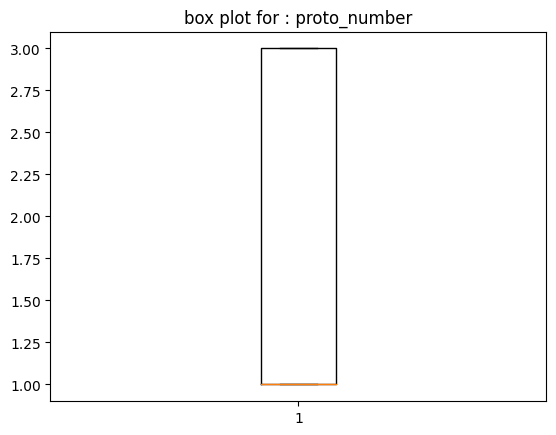

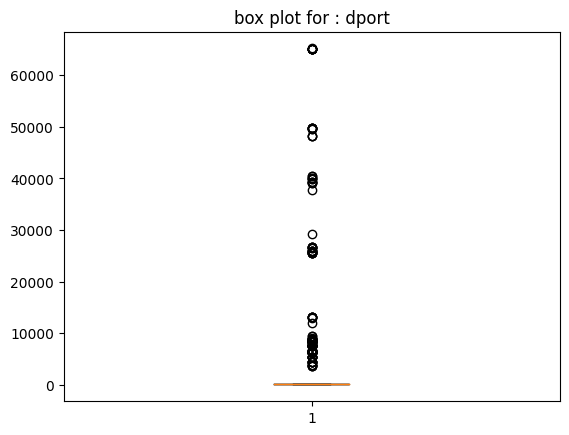

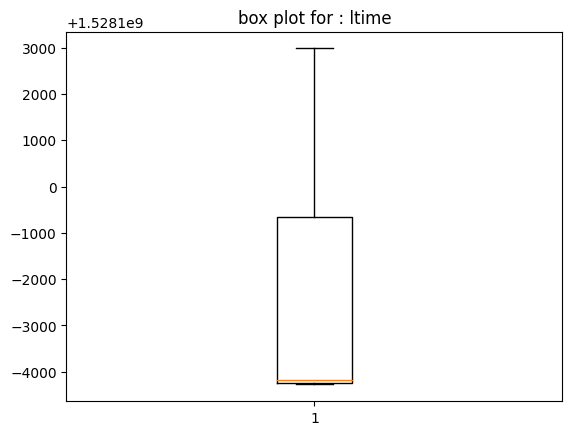

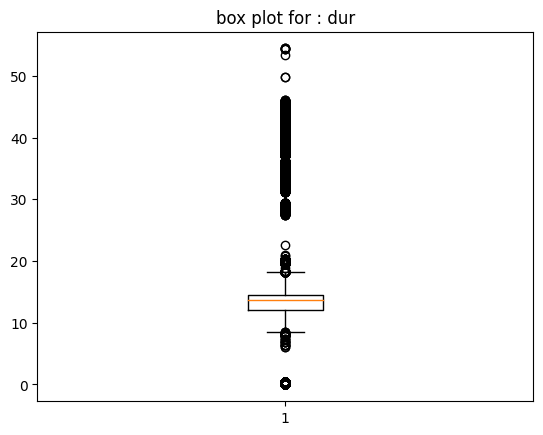

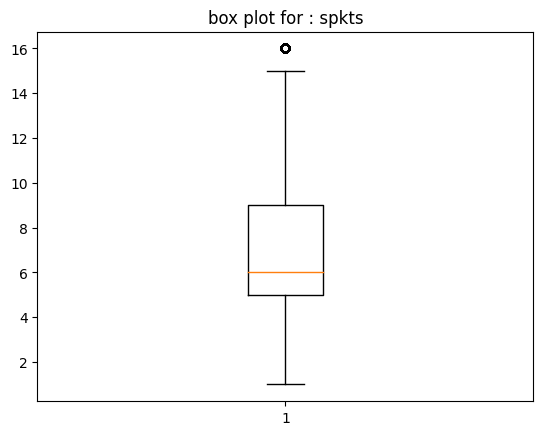

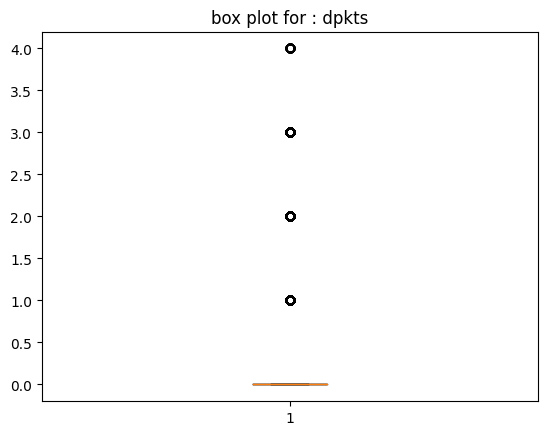

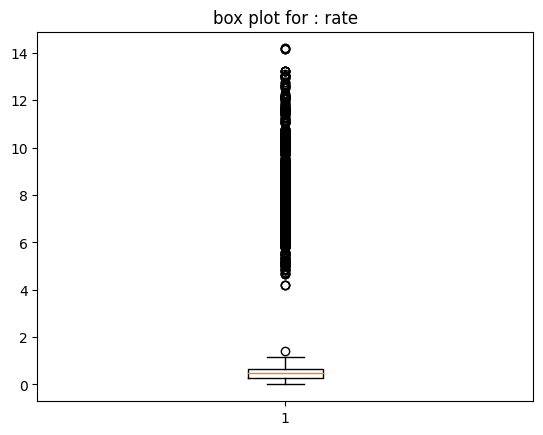

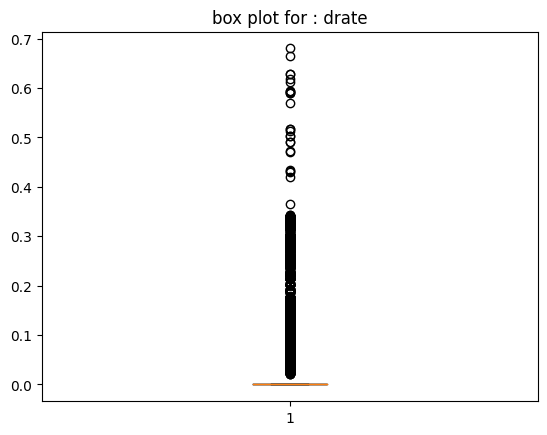

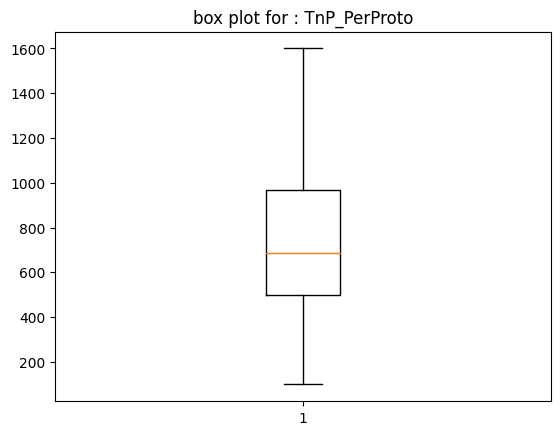

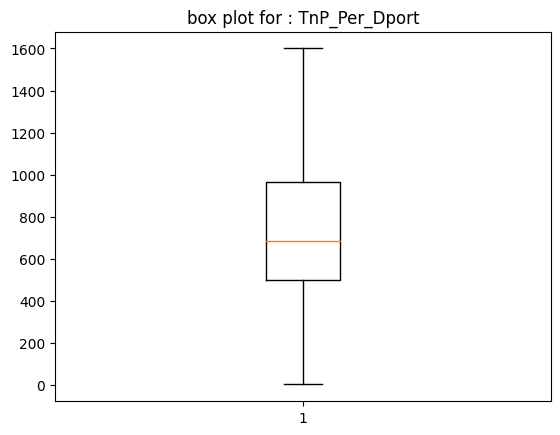

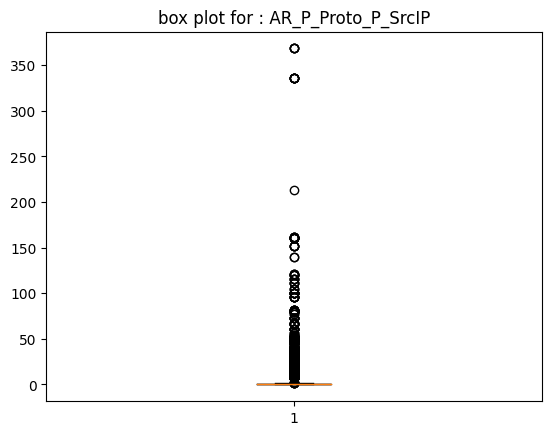

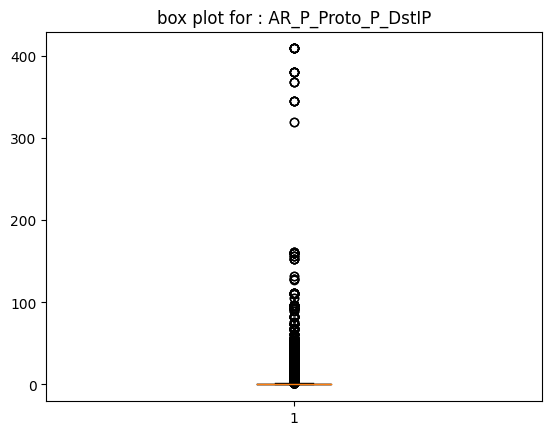

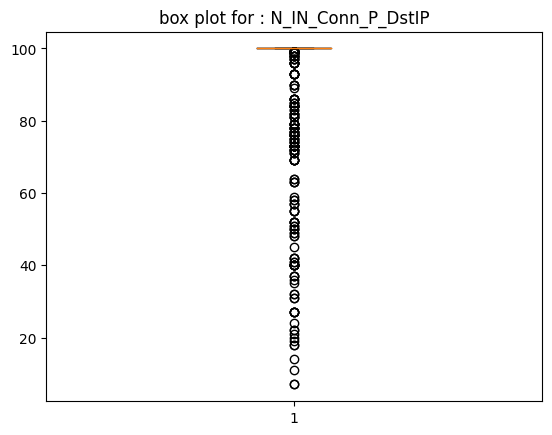

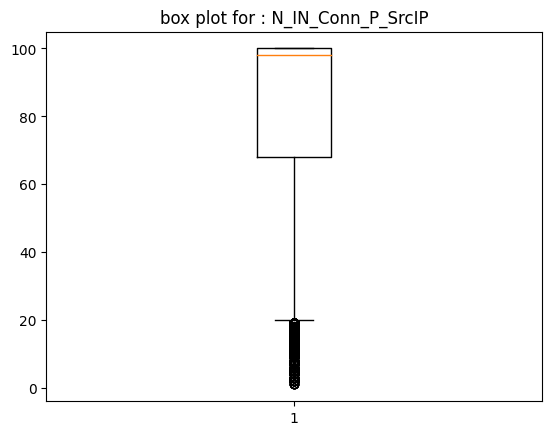

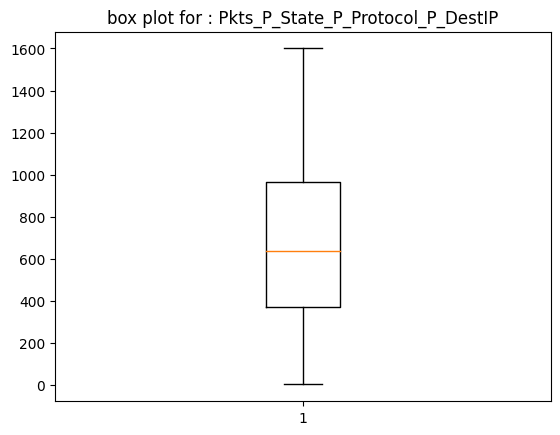

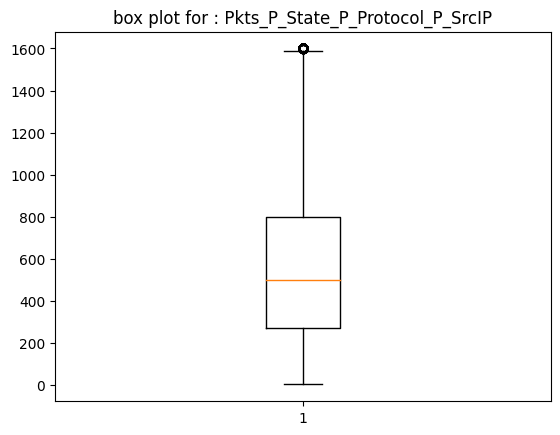

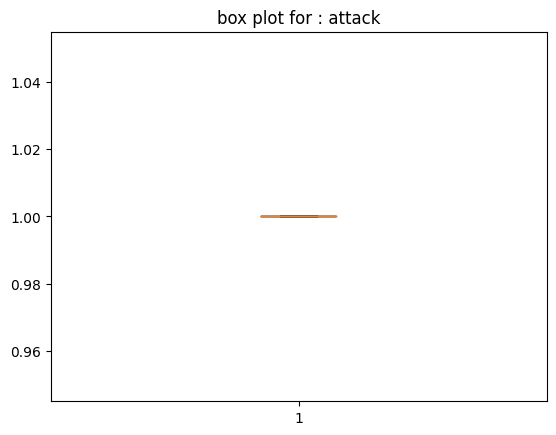

In [ ]:
for i in x_train.select_dtypes(exclude='object').columns:
    plt.title(f'box plot for : {i}')
    plt.boxplot(x_train[i])
    plt.show()

In [ ]:
def checking_outliers(x_train):
    a=len(x_train.select_dtypes(exclude='object').columns)
    j=0
    plt.figure(figsize=(20,15))
    for i in x_train.select_dtypes(exclude='object').columns:
        j+=1
        plt.subplot(int(a/2)+1,2,j)
        x_train[i].plot(kind='box')
    plt.show()

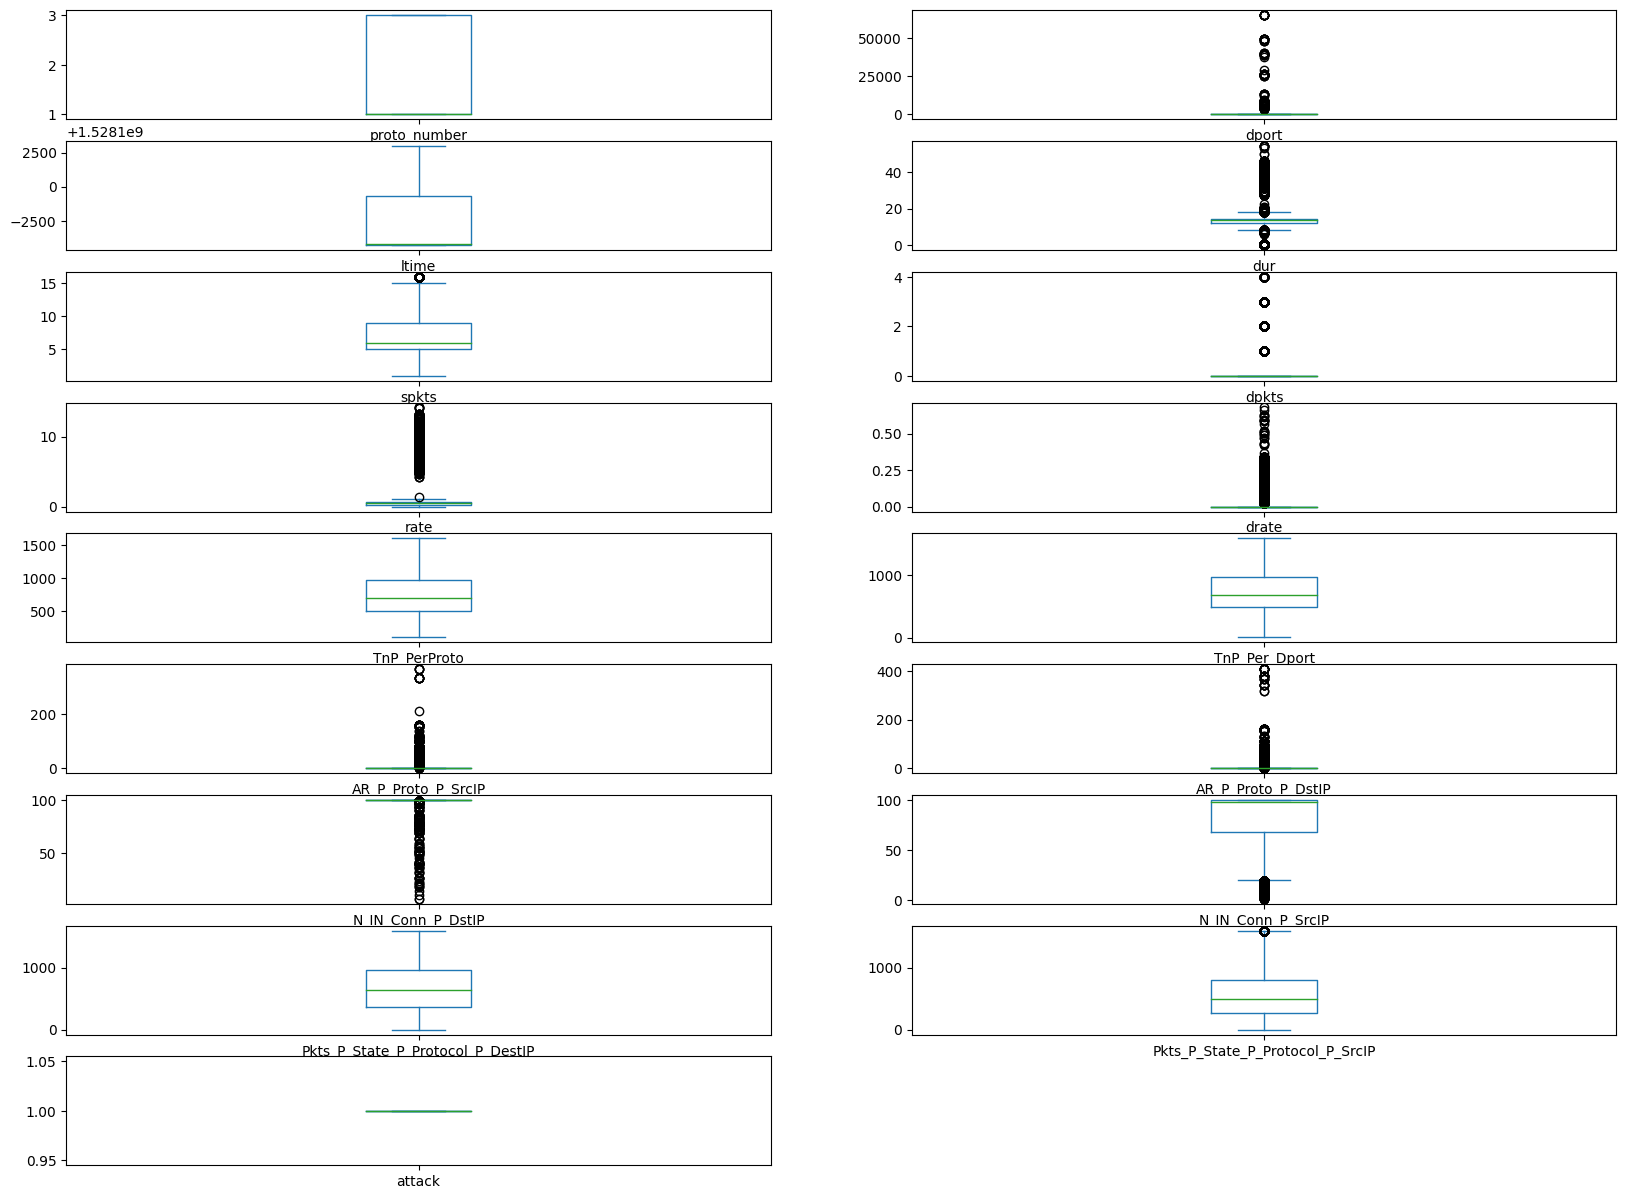

In [ ]:
checking_outliers(x_train)

In [ ]:
x_train.select_dtypes(exclude='object').columns

Index(['proto_number', 'dport', 'ltime', 'dur', 'spkts', 'dpkts', 'rate',
       'drate', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack'],
      dtype='object')

In [ ]:
x_train.select_dtypes(include='object').columns

Index(['flgs', 'saddr', 'daddr', 'state'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
def scaling_features(x_train, x_test):
    sc = StandardScaler()

    numerical_training_data = x_train[x_train.select_dtypes(exclude='object').columns]
    categorical_training_data = x_train[x_train.select_dtypes(include='object').columns]

    numerical_test_data = x_test[x_test.select_dtypes(exclude='object').columns]
    categorical_test_data = x_test[x_test.select_dtypes(include='object').columns]

    train_num = sc.fit_transform(numerical_training_data)

    test_num = sc.transform(numerical_test_data)

    k_train = pd.DataFrame(train_num, index=numerical_training_data.index, columns=numerical_training_data.columns)

    l_test = pd.DataFrame(test_num, index=numerical_test_data.index, columns=numerical_test_data.columns)

#     X_train = pd.concat([k, categorical_training_data], axis=1)
#     X_test = pd.concat([l, categorical_test_data], axis=1)

    return k_train,l_test,categorical_training_data,categorical_test_data

In [ ]:
numerical_training_data,numerical_test_data,categorical_training_data,categorical_test_data = scaling_features(x_train,x_test)

In [ ]:
categorical_training_data.head(5)

,flgs,saddr,daddr,state
75220,e,192.168.100.147,192.168.100.3,INT
48955,e,192.168.100.147,192.168.100.3,INT
44966,e s,192.168.100.150,192.168.100.3,ACC
13568,e,192.168.100.148,192.168.100.3,REQ
92727,e,192.168.100.150,192.168.100.3,INT


In [ ]:
categorical_test_data.head()

,flgs,saddr,daddr,state
75721,e s,192.168.100.148,192.168.100.3,REQ
80184,e,192.168.100.148,192.168.100.3,INT
19864,e,192.168.100.150,192.168.100.3,INT
76699,e,192.168.100.148,192.168.100.3,INT
92991,e,192.168.100.147,192.168.100.3,INT


In [ ]:
numerical_training_data.head()

,proto_number,dport,ltime,dur,spkts,dpkts,rate,drate,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
75220,1.001852,-0.029571,0.985632,-0.043687,1.557030,-0.500771,0.184805,-0.19512,1.386229,1.385114,-0.045293,-0.057511,0.040524,0.448512,1.370056,1.470601,0.0
48955,1.001852,-0.029571,1.002614,-0.094497,2.081896,-0.500771,0.331349,-0.19512,1.944292,1.941134,-0.020223,-0.038700,0.040524,0.739073,1.864987,2.149905,0.0
44966,-0.998152,-0.029571,-0.992562,-0.336494,-0.804865,1.156314,-0.242749,-0.19512,-0.806566,-0.799649,-0.122954,-0.107128,0.040524,-0.921277,-1.364565,-1.124947,0.0
13568,-0.998152,-0.029571,-1.020858,-1.690876,-1.592163,-0.500771,-0.534252,-0.19512,-1.485825,-1.476420,2.118677,1.434538,0.040524,0.739073,-1.589534,-1.353072,0.0
92727,1.001852,-0.029571,0.985941,-0.500698,-0.279999,-0.500771,-0.119600,-0.19512,-0.465527,-0.459859,-0.091395,-0.090929,0.040524,-1.377873,-0.272216,-0.721927,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = OneHotEncoder(categories='auto',drop='first')

train_h = s.fit_transform(categorical_training_data[['flgs','saddr','daddr','state']])

train_h = train_h.toarray()

train_h = pd.DataFrame(train_h,index=categorical_training_data.index)

train_h.columns = s.get_feature_names_out()


In [ ]:
train_h.head()

,flgs_e *,flgs_e g,flgs_e s,flgs_eU,saddr_192.168.100.148,saddr_192.168.100.149,saddr_192.168.100.150,saddr_192.168.100.3,daddr_192.168.100.148,daddr_192.168.100.149,daddr_192.168.100.150,daddr_192.168.100.3,state_INT,state_REQ,state_RST
75220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
44966,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
92727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
train_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flgs_e *               80000 non-null  float64
 1   flgs_e g               80000 non-null  float64
 2   flgs_e s               80000 non-null  float64
 3   flgs_eU                80000 non-null  float64
 4   saddr_192.168.100.148  80000 non-null  float64
 5   saddr_192.168.100.149  80000 non-null  float64
 6   saddr_192.168.100.150  80000 non-null  float64
 7   saddr_192.168.100.3    80000 non-null  float64
 8   daddr_192.168.100.148  80000 non-null  float64
 9   daddr_192.168.100.149  80000 non-null  float64
 10  daddr_192.168.100.150  80000 non-null  float64
 11  daddr_192.168.100.3    80000 non-null  float64
 12  state_INT              80000 non-null  float64
 13  state_REQ              80000 non-null  float64
 14  state_RST              80000 non-null  float64
dty

In [ ]:
test_h = s.transform(categorical_test_data[['flgs','saddr','daddr','state']])
test_h = test_h.toarray()

test_h = pd.DataFrame(test_h,index=categorical_test_data.index)

test_h.columns = s.get_feature_names_out()

In [ ]:
test_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 75721 to 42410
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flgs_e *               20000 non-null  float64
 1   flgs_e g               20000 non-null  float64
 2   flgs_e s               20000 non-null  float64
 3   flgs_eU                20000 non-null  float64
 4   saddr_192.168.100.148  20000 non-null  float64
 5   saddr_192.168.100.149  20000 non-null  float64
 6   saddr_192.168.100.150  20000 non-null  float64
 7   saddr_192.168.100.3    20000 non-null  float64
 8   daddr_192.168.100.148  20000 non-null  float64
 9   daddr_192.168.100.149  20000 non-null  float64
 10  daddr_192.168.100.150  20000 non-null  float64
 11  daddr_192.168.100.3    20000 non-null  float64
 12  state_INT              20000 non-null  float64
 13  state_REQ              20000 non-null  float64
 14  state_RST              20000 non-null  float64
dty

In [ ]:
y_train.head()

75220    udp
48955    udp
44966    tcp
13568    tcp
92727    udp
Name: proto, dtype: object

In [ ]:
y_train.value_counts()

tcp    40074
udp    39926
Name: proto, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l = LabelEncoder()
y_train_label = l.fit_transform(y_train)
y_train_label = pd.DataFrame(y_train_label,index = y_train.index, columns = ['proto'] )

In [ ]:
y_train_label.head()

,proto
75220,1
48955,1
44966,0
13568,0
92727,1


In [ ]:
y_train_label.value_counts()

proto
0        40074
1        39926
dtype: int64

In [ ]:
y_test.head()

75721    tcp
80184    udp
19864    udp
76699    udp
92991    udp
Name: proto, dtype: object

In [ ]:
y_test.value_counts()

udp    10074
tcp     9926
Name: proto, dtype: int64

In [ ]:
y_test_label = l.transform(y_test)
y_test_label = pd.DataFrame(y_test_label , index=y_test.index, columns = ['proto'])
y_test_label.head()

,proto
75721,0
80184,1
19864,1
76699,1
92991,1


In [ ]:
y_test_label.value_counts()

proto
1        10074
0         9926
dtype: int64

In [ ]:
y_train_1 = y_train_label['proto']
y_test_1 = y_test_label['proto']

In [ ]:
y_train_1

75220    1
48955    1
44966    0
13568    0
92727    1
        ..
6265     1
54886    1
76820    0
860      1
15795    1
Name: proto, Length: 80000, dtype: int64

In [ ]:
c = numerical_training_data.columns
c

Index(['proto_number', 'dport', 'ltime', 'dur', 'spkts', 'dpkts', 'rate',
       'drate', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack'],
      dtype='object')

In [ ]:
from scipy.stats import pearsonr

In [ ]:
def feature_selection(x_train,x_test,y_train):
    corr = []
    cor = x_train.columns
    for i in cor:
        sol = pearsonr(x_train[i], y_train)
        corr.append(sol)
    corr = np.array(corr)
    p_value_num = pd.Series(corr[: , 1],index=x_train.columns)

    #p_value_num = p_value_num.sort_values(ascending=True)

    print(f"p value num is : {p_value_num}")
    p_value_num.plot.bar()
    plt.show()
    for j in range(len(p_value_num)):
        if p_value_num[j] > 0.05:
            #a = p_value_num[j].index
            x_train = x_train.drop([cor[j]], axis=1)
            x_test = x_test.drop([cor[j]], axis=1)
            print(f"removed {cor[j]} ")

        else:
            print(f"not removed {cor[j]} ")

    return x_train,x_test

p value num is : proto_number                         0.000000e+00
dport                                6.809362e-17
ltime                                0.000000e+00
dur                                  0.000000e+00
spkts                                0.000000e+00
dpkts                                0.000000e+00
rate                                 1.410643e-20
drate                                0.000000e+00
TnP_PerProto                         0.000000e+00
TnP_Per_Dport                        0.000000e+00
AR_P_Proto_P_SrcIP                   1.190725e-78
AR_P_Proto_P_DstIP                   2.425698e-88
N_IN_Conn_P_DstIP                    9.677564e-28
N_IN_Conn_P_SrcIP                   9.709394e-134
Pkts_P_State_P_Protocol_P_DestIP     0.000000e+00
Pkts_P_State_P_Protocol_P_SrcIP      0.000000e+00
attack                                        NaN
dtype: float64


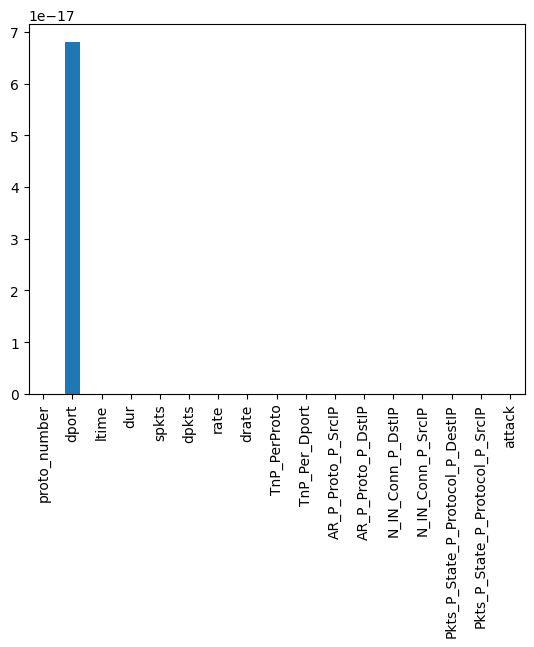

not removed proto_number 
not removed dport 
not removed ltime 
not removed dur 
not removed spkts 
not removed dpkts 
not removed rate 
not removed drate 
not removed TnP_PerProto 
not removed TnP_Per_Dport 
not removed AR_P_Proto_P_SrcIP 
not removed AR_P_Proto_P_DstIP 
not removed N_IN_Conn_P_DstIP 
not removed N_IN_Conn_P_SrcIP 
not removed Pkts_P_State_P_Protocol_P_DestIP 
not removed Pkts_P_State_P_Protocol_P_SrcIP 
not removed attack 


(       proto_number     dport     ltime       dur     spkts     dpkts  \
 75220      1.001852 -0.029571  0.985632 -0.043687  1.557030 -0.500771   
 48955      1.001852 -0.029571  1.002614 -0.094497  2.081896 -0.500771   
 44966     -0.998152 -0.029571 -0.992562 -0.336494 -0.804865  1.156314   
 13568     -0.998152 -0.029571 -1.020858 -1.690876 -1.592163 -0.500771   
 92727      1.001852 -0.029571  0.985941 -0.500698 -0.279999 -0.500771   
 ...             ...       ...       ...       ...       ...       ...   
 6265       1.001852 -0.029571  0.985990 -0.008846  0.769732 -0.500771   
 54886      1.001852 -0.029571  1.010302 -0.212461  1.819463 -0.500771   
 76820     -0.998152 -0.029571 -0.993017 -0.070892 -0.542432 -0.500771   
 860        1.001852 -0.029571  1.002405 -0.059499 -0.017567 -0.500771   
 15795      1.001852 -0.029571  0.994201 -0.129646  2.081896 -0.500771   
 
            rate    drate  TnP_PerProto  TnP_Per_Dport  AR_P_Proto_P_SrcIP  \
 75220  0.184805 -0.19512      1

In [ ]:
feature_selection(numerical_training_data,numerical_test_data,y_train_1)

In [ ]:
numerical_training_data.corr()

,proto_number,dport,ltime,dur,spkts,dpkts,rate,drate,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
proto_number,1.000000,-0.029517,0.995013,-0.163960,0.735525,-0.499846,0.032870,-0.194760,0.704529,0.705953,-0.066311,-0.070363,0.038580,0.086849,0.765211,0.653171,NaN
dport,-0.029517,1.000000,-0.029279,0.023546,-0.011490,0.062102,-0.007187,0.026913,-0.001277,-0.060504,-0.003560,-0.003202,-0.472426,-0.004246,-0.013913,-0.000247,NaN
ltime,0.995013,-0.029279,1.000000,-0.151480,0.735981,-0.482404,0.029833,-0.168938,0.707858,0.709433,-0.068551,-0.072472,0.031761,0.084131,0.767435,0.653428,NaN
dur,-0.163960,0.023546,-0.151480,1.000000,0.071162,0.317165,-0.274708,0.090312,0.122316,0.117426,-0.176151,-0.163110,-0.059033,0.020494,0.030109,0.039843,NaN
spkts,0.735525,-0.011490,0.735981,0.071162,1.000000,-0.220955,0.035596,-0.027177,0.958770,0.956539,-0.105685,-0.114375,0.016854,0.091889,0.938949,0.864141,NaN
dpkts,-0.499846,0.062102,-0.482404,0.317165,-0.220955,1.000000,0.119520,0.617765,-0.170822,-0.178919,0.011797,-0.008565,-0.075554,-0.053847,-0.207009,-0.170929,NaN
rate,0.032870,-0.007187,0.029833,-0.274708,0.035596,0.119520,1.000000,-0.018400,0.020643,0.021603,0.273898,0.148107,0.011528,-0.003620,0.051421,0.058960,NaN
drate,-0.194760,0.026913,-0.168938,0.090312,-0.027177,0.617765,-0.018400,1.000000,0.004712,0.000622,-0.019514,-0.018975,-0.039922,-0.034520,-0.004101,-0.005725,NaN
TnP_PerProto,0.704529,-0.001277,0.707858,0.122316,0.958770,-0.170822,0.020643,0.004712,1.000000,0.996060,-0.112906,-0.124055,0.005015,0.087647,0.960057,0.857436,NaN
TnP_Per_Dport,0.705953,-0.060504,0.709433,0.117426,0.956539,-0.178919,0.021603,0.000622,0.996060,1.000000,-0.111998,-0.123160,0.060288,0.088025,0.957837,0.854154,NaN


In [ ]:
numerical_training_data['attack'].head()

75220    0.0
48955    0.0
44966    0.0
13568    0.0
92727    0.0
Name: attack, dtype: float64

In [ ]:
v = list(numerical_training_data.var())

In [ ]:
len(v)

17

In [ ]:
train_columns = list(numerical_training_data.columns)

In [ ]:
len(train_columns)

17

In [ ]:
t = 0.0001
for i in v:
    if i < t:
        print(f"column name is : {train_columns[v.index(i)]}")
        final_training_data = numerical_training_data.drop(columns = [train_columns[v.index(i)]])
        final_testing_data = numerical_test_data.drop(columns = [train_columns[v.index(i)]])

column name is : attack


In [ ]:
final_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   proto_number                      80000 non-null  float64
 1   dport                             80000 non-null  float64
 2   ltime                             80000 non-null  float64
 3   dur                               80000 non-null  float64
 4   spkts                             80000 non-null  float64
 5   dpkts                             80000 non-null  float64
 6   rate                              80000 non-null  float64
 7   drate                             80000 non-null  float64
 8   TnP_PerProto                      80000 non-null  float64
 9   TnP_Per_Dport                     80000 non-null  float64
 10  AR_P_Proto_P_SrcIP                80000 non-null  float64
 11  AR_P_Proto_P_DstIP                80000 non-null  float64
 12  

In [ ]:
final_testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 75721 to 42410
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   proto_number                      20000 non-null  float64
 1   dport                             20000 non-null  float64
 2   ltime                             20000 non-null  float64
 3   dur                               20000 non-null  float64
 4   spkts                             20000 non-null  float64
 5   dpkts                             20000 non-null  float64
 6   rate                              20000 non-null  float64
 7   drate                             20000 non-null  float64
 8   TnP_PerProto                      20000 non-null  float64
 9   TnP_Per_Dport                     20000 non-null  float64
 10  AR_P_Proto_P_SrcIP                20000 non-null  float64
 11  AR_P_Proto_P_DstIP                20000 non-null  float64
 12  

In [ ]:
### FINAL COLUMNS

#1) final_training_data,final_testing_data

In [ ]:
final_x_train_data = pd.concat([final_training_data,train_h],axis=1)

In [ ]:
final_x_train_data

,proto_number,dport,ltime,dur,spkts,dpkts,rate,drate,TnP_PerProto,TnP_Per_Dport,...,saddr_192.168.100.149,saddr_192.168.100.150,saddr_192.168.100.3,daddr_192.168.100.148,daddr_192.168.100.149,daddr_192.168.100.150,daddr_192.168.100.3,state_INT,state_REQ,state_RST
75220,1.001852,-0.029571,0.985632,-0.043687,1.557030,-0.500771,0.184805,-0.19512,1.386229,1.385114,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48955,1.001852,-0.029571,1.002614,-0.094497,2.081896,-0.500771,0.331349,-0.19512,1.944292,1.941134,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
44966,-0.998152,-0.029571,-0.992562,-0.336494,-0.804865,1.156314,-0.242749,-0.19512,-0.806566,-0.799649,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,-0.998152,-0.029571,-1.020858,-1.690876,-1.592163,-0.500771,-0.534252,-0.19512,-1.485825,-1.476420,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
92727,1.001852,-0.029571,0.985941,-0.500698,-0.279999,-0.500771,-0.119600,-0.19512,-0.465527,-0.459859,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.001852,-0.029571,0.985990,-0.008846,0.769732,-0.500771,-0.006130,-0.19512,0.867624,0.868409,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54886,1.001852,-0.029571,1.010302,-0.212461,1.819463,-0.500771,0.333654,-0.19512,1.479239,1.477784,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
76820,-0.998152,-0.029571,-0.993017,-0.070892,-0.542432,-0.500771,-0.290541,-0.19512,-0.459890,-0.454243,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
860,1.001852,-0.029571,1.002405,-0.059499,-0.017567,-0.500771,-0.171239,-0.19512,-0.104759,-0.100412,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
final_x_train_data.isnull().sum()

proto_number                        0
dport                               0
ltime                               0
dur                                 0
spkts                               0
dpkts                               0
rate                                0
drate                               0
TnP_PerProto                        0
TnP_Per_Dport                       0
AR_P_Proto_P_SrcIP                  0
AR_P_Proto_P_DstIP                  0
N_IN_Conn_P_DstIP                   0
N_IN_Conn_P_SrcIP                   0
Pkts_P_State_P_Protocol_P_DestIP    0
Pkts_P_State_P_Protocol_P_SrcIP     0
flgs_e *                            0
flgs_e g                            0
flgs_e s                            0
flgs_eU                             0
saddr_192.168.100.148               0
saddr_192.168.100.149               0
saddr_192.168.100.150               0
saddr_192.168.100.3                 0
daddr_192.168.100.148               0
daddr_192.168.100.149               0
daddr_192.16

In [ ]:
final_x_test_data = pd.concat([final_testing_data,test_h],axis=1)

In [ ]:
final_x_test_data

,proto_number,dport,ltime,dur,spkts,dpkts,rate,drate,TnP_PerProto,TnP_Per_Dport,...,saddr_192.168.100.149,saddr_192.168.100.150,saddr_192.168.100.3,daddr_192.168.100.148,daddr_192.168.100.149,daddr_192.168.100.150,daddr_192.168.100.3,state_INT,state_REQ,state_RST
75721,-0.998152,-0.029571,-0.992843,-0.233126,-0.542432,-0.500771,-0.263419,-0.19512,-0.499349,-0.493557,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
80184,1.001852,-0.029571,0.985984,-0.006015,0.507299,-0.500771,-0.065599,-0.19512,1.050827,1.050941,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19864,1.001852,-0.029571,0.993864,-0.304623,-0.017567,-0.500771,-0.107050,-0.19512,-0.104759,-0.100412,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
76699,1.001852,-0.029571,1.010559,-0.128863,1.032165,-0.500771,0.097638,-0.19512,0.515311,0.517387,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
92991,1.001852,-0.029571,0.986116,0.076654,1.557030,-0.500771,0.135849,-0.19512,1.634257,1.632234,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,1.001852,-0.029571,1.002674,-0.095243,2.081896,-0.500771,0.331754,-0.19512,2.150043,2.146131,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
29313,1.001852,-0.029571,1.010657,-0.119554,2.081896,-0.500771,0.345152,-0.19512,2.150043,2.146131,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
37862,-0.998152,-0.029571,-0.993746,-0.480577,-0.804865,-0.500771,-0.289597,-0.19512,-0.950310,-0.942866,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53421,-0.998152,-0.029571,-1.019274,-1.690876,-1.592163,-0.500771,-0.534252,-0.19512,-1.795860,-1.785319,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
final_x_test_data.isnull().sum()

proto_number                        0
dport                               0
ltime                               0
dur                                 0
spkts                               0
dpkts                               0
rate                                0
drate                               0
TnP_PerProto                        0
TnP_Per_Dport                       0
AR_P_Proto_P_SrcIP                  0
AR_P_Proto_P_DstIP                  0
N_IN_Conn_P_DstIP                   0
N_IN_Conn_P_SrcIP                   0
Pkts_P_State_P_Protocol_P_DestIP    0
Pkts_P_State_P_Protocol_P_SrcIP     0
flgs_e *                            0
flgs_e g                            0
flgs_e s                            0
flgs_eU                             0
saddr_192.168.100.148               0
saddr_192.168.100.149               0
saddr_192.168.100.150               0
saddr_192.168.100.3                 0
daddr_192.168.100.148               0
daddr_192.168.100.149               0
daddr_192.16

In [ ]:
y_train_1

75220    1
48955    1
44966    0
13568    0
92727    1
        ..
6265     1
54886    1
76820    0
860      1
15795    1
Name: proto, Length: 80000, dtype: int64

In [ ]:
y_test_1

75721    0
80184    1
19864    1
76699    1
92991    1
        ..
32595    1
29313    1
37862    0
53421    0
42410    0
Name: proto, Length: 20000, dtype: int64

In [ ]:
final_x_train_data.head()

,proto_number,dport,ltime,dur,spkts,dpkts,rate,drate,TnP_PerProto,TnP_Per_Dport,...,saddr_192.168.100.149,saddr_192.168.100.150,saddr_192.168.100.3,daddr_192.168.100.148,daddr_192.168.100.149,daddr_192.168.100.150,daddr_192.168.100.3,state_INT,state_REQ,state_RST
75220,1.001852,-0.029571,0.985632,-0.043687,1.557030,-0.500771,0.184805,-0.19512,1.386229,1.385114,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48955,1.001852,-0.029571,1.002614,-0.094497,2.081896,-0.500771,0.331349,-0.19512,1.944292,1.941134,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
44966,-0.998152,-0.029571,-0.992562,-0.336494,-0.804865,1.156314,-0.242749,-0.19512,-0.806566,-0.799649,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,-0.998152,-0.029571,-1.020858,-1.690876,-1.592163,-0.500771,-0.534252,-0.19512,-1.485825,-1.476420,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
92727,1.001852,-0.029571,0.985941,-0.500698,-0.279999,-0.500771,-0.119600,-0.19512,-0.465527,-0.459859,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
